In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. RAW : 설비에 센서를 부착하여 Timestamp 순서대로 관측된 센서의 계측값에 따른 설비상태를 나타내는 데이터

In [ ]:
sample = pd.read_excel('/Users/mac/Desktop/신뢰성/문제1 데이터.xlsx')
sample

,Timestamp,Sensor_1,Sensor_2,Sensor_3,설비상태
0,1,43,88,12,정상
1,2,45,94,19,고장
2,3,40,82,11,정상
3,4,45,39,6,정상
4,5,47,37,5,정상
...,...,...,...,...,...
95,96,26,72,1,정상
96,97,42,93,-6,고장
97,98,27,55,-9,정상
98,99,16,23,9,정상


### timestamp = range(1,101)
### temperature = np.random.randint(10,20,100)
### humidity = np.random.randint(30,70,100)

In [ ]:
#timestamp = range(1,101)
#temperature = np.random.randint(10,20,100)
#humidity = np.random.randint(30,70,100)

timestamp = pd.Series(range(1,101))
temperature = pd.Series(np.random.randint(10,20,100))
humidity = pd.Series(np.random.randint(30,70,100))

index = ['{0}'.format(t) for t in range(100)]

new_df = pd.DataFrame(index=index, columns=['Timestamp','온도','습도'])

new_df['Timestamp'] = range(1,101)
new_df['온도'] = np.random.randint(10,20,100)
new_df['습도'] = np.random.randint(30,70,100)

new_df

,Timestamp,온도,습도
0,1,16,46
1,2,17,30
2,3,13,59
3,4,16,61
4,5,15,41
...,...,...,...
95,96,19,38
96,97,12,59
97,98,12,62
98,99,16,42


In [ ]:
merged_df = pd.merge(sample,new_df,on='Timestamp')
merged_df

,Timestamp,Sensor_1,Sensor_2,Sensor_3,설비상태,온도,습도
0,1,43,88,12,정상,16,46
1,2,45,94,19,고장,17,30
2,3,40,82,11,정상,13,59
3,4,45,39,6,정상,16,61
4,5,47,37,5,정상,15,41
...,...,...,...,...,...,...,...
95,96,26,72,1,정상,19,38
96,97,42,93,-6,고장,12,59
97,98,27,55,-9,정상,12,62
98,99,16,23,9,정상,16,42


In [ ]:
df = pd.read_csv('/Users/mac/Desktop/신뢰성/문제2 데이터.csv')
df

,제품ID,고장유형,고장시간
0,test1,a,888
1,test2,a,635
2,test3,a,201
3,test4,a,2024
4,test5,a,1689
...,...,...,...
303,test304,b,1511
304,test305,b,1924
305,test306,b,863
306,test307,b,1174


### 고장유형 a의 MTTF와 고장유형 b의 B25수명 검출

In [ ]:
type1_item = df[df['고장유형']=='a']['고장시간']
type2_item = df[df['고장유형']=='b']['고장시간']

mttf = type1_item.describe()['mean']
b25 = type2_item.describe()['25%']

print('고장유형 a의 MTTF:{0}, 고장유형 b25 수명:{1}'.format(mttf, b25))

고장유형 a의 MTTF:1021.437037037037, 고장유형 b25 수명:538.0


In [ ]:
df = df[df['고장시간']<2000]
df

,제품ID,고장유형,고장시간
0,test1,a,888
1,test2,a,635
2,test3,a,201
4,test5,a,1689
5,test6,a,353
...,...,...,...
303,test304,b,1511
304,test305,b,1924
305,test306,b,863
306,test307,b,1174


### 고장유형별 누적고장개수 데이터프레임 생성
### (구간 : 0~2000 / 간격 : 100)
### (column명 : '고장유형a', '고장유형b')
![image.png](attachment:image.png)

In [ ]:
index = ['({0}:{1}]'.format(t,t+100) for t in range(0,2000,100)]

cdf = pd.DataFrame(index=index, columns=['고장유형a','고장유형b'])

for i,t in zip(cdf.index, range(0,2000,100)):
    cdf.loc[i,'고장유형a'] = sum(type1_item<t+100)
    cdf.loc[i,'고장유형b'] = sum(type2_item<t+100)
    
cdf

,고장유형a,고장유형b
(0:100],5,13
(100:200],10,20
(200:300],19,26
(300:400],26,34
(400:500],34,40
(500:600],39,47
(600:700],44,56
(700:800],48,62
(800:900],57,67
(900:1000],68,77


### 고장유형별 제품의 신뢰도(R(t))

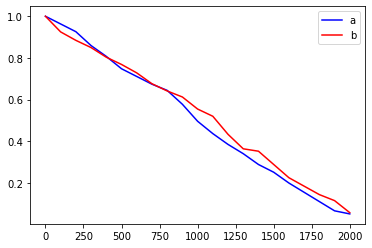

In [ ]:
type1_Rt = [1] + [1-x/len(type1_item) for x in cdf['고장유형a']]
type2_Rt = [1] + [1-x/len(type2_item) for x in cdf['고장유형b']]

t = range(0,2100,100)

plt.plot(t,type1_Rt, color = 'b', label='a')
plt.plot(t,type2_Rt, color = 'r', label='b')
plt.legend()
plt.show()

### 제품B 수명 = 형상모수 1.8, 척도모수가 100인 와이블분포

In [ ]:
def weib_f(t,beta,eta):
    return (beta / eta) * (t / eta)**(beta - 1) * np.exp(-(t / eta)**beta)

def weib_F(t,beta,eta):
    return 1-np.exp(-(t / eta)**beta)

### t가 0~500까지 제품B 신뢰도(R(t)) plotting

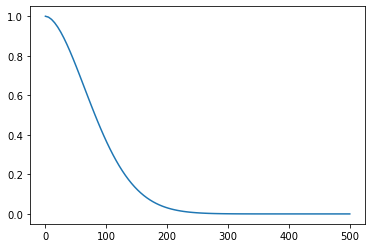

In [ ]:
def weib_R(t,beta,eta):
    e = np.exp(1)
    return e**(-(t/eta)**beta)

t_list = list(np.linspace(0,500,100))

weib0_Rt = [weib_R(t,1.8,100) for t in t_list]

plt.plot(t_list, weib0_Rt)
plt.show()

### t가 0~500까지 제품B의 고장률(h(t))를 plottinㅎ


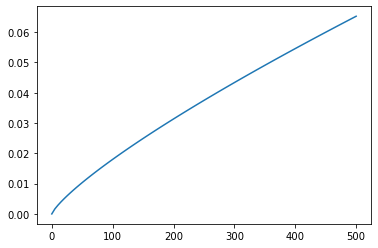

In [ ]:
def weib_h(t,beta,eta):
    e = np.exp(1)
    return (beta / eta) * (t / eta)**(beta - 1)

t_list = list(np.linspace(0,500,100))

weib0_ht = [weib_h(t,1.8,100) for t in t_list]

plt.plot(t_list, weib0_ht)
plt.show()

### t=50일때까지 고장없이 작동한 제품이 t=100까지 고장없이 더 작동할 확률

In [ ]:
sol = weib_R(100,1.8,100)
sol

0.36787944117144233